### 3. High-level analysis

Perform **at least 6** higher-level analyses of your data. You are free to use any techniques we discussed in class, including but not limited to:

* Use Pandas features to answer specific questions about the data
* Perform a cluster analysis to identify groups within your data
* Identify and motivate a machine learning problem in your data (classification or regression). Create a train/test/validation split and evaluate how well an appropriate model performs
* Perform a linear regression to show the relationship between two variables

If applicable to an analysis, you **must** include:

* Appropriate statistical test(s)
* An appropriate visualization.

Please take advantage of the check-ins or office hours if you are unsure whether a visualization or statistical test is necessary for an analysis.

In [1]:
import pandas as pd

df = pd.read_csv("../datasets/processed/arrests2025_cleaned.csv")
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,MIN_AGE,MAX_AGE,DAY_OF_WEEK,MONTH
0,298799078,2025-01-02,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,23,...,BLACK,1000213,228833,40.794755,-73.942348,POINT (-73.9423482609703 40.79475532416718),25,44,Thursday,January
1,299008265,2025-01-07,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,113,...,BLACK,1046399,187126,40.680086,-73.775931,POINT (-73.775931 40.680086),45,64,Tuesday,January
2,298969999,2025-01-06,793,WEAPONS POSSESSION 3,118.0,DANGEROUS WEAPONS,PL 2650201,F,M,5,...,WHITE,983907,199958,40.715526,-74.001238,POINT (-74.001238 40.715526),25,44,Monday,January
3,299436365,2025-01-14,157,RAPE 1,104.0,RAPE,PL 130352B,F,Q,112,...,BLACK,1025401,202586,40.722641,-73.851542,POINT (-73.8515418216779 40.7226409964758),45,64,Tuesday,January
4,299562518,2025-01-16,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601504,F,M,26,...,BLACK,996342,236149,40.814853,-73.956314,POINT (-73.956314 40.814853),0,17,Thursday,January


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71028 entries, 0 to 71027
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ARREST_KEY                71028 non-null  int64         
 1   ARREST_DATE               71028 non-null  datetime64[ns]
 2   PD_CD                     71028 non-null  int64         
 3   PD_DESC                   71028 non-null  object        
 4   KY_CD                     71024 non-null  float64       
 5   OFNS_DESC                 71028 non-null  object        
 6   LAW_CODE                  71028 non-null  object        
 7   LAW_CAT_CD                70668 non-null  object        
 8   ARREST_BORO               71028 non-null  object        
 9   ARREST_PRECINCT           71028 non-null  int64         
 10  JURISDICTION_CODE         71028 non-null  int64         
 11  AGE_GROUP                 71028 non-null  object        
 12  PERP_SEX          

In [44]:
df_demographics = df.groupby(['ARREST_BORO','AGE_GROUP', 'PERP_SEX', 'PERP_RACE']).size().reset_index(name='ARREST_COUNT')
df_demographics.head()

,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE,ARREST_COUNT
0,B,18-24,F,ASIAN / PACIFIC ISLANDER,5
1,B,18-24,F,BLACK,232
2,B,18-24,F,BLACK HISPANIC,67
3,B,18-24,F,UNKNOWN,4
4,B,18-24,F,WHITE,13


In [45]:
desired_order = ['<18', '18-24', '25-44', '45-64', '65+']
df_demographics['AGE_GROUP'] = pd.Categorical(df_demographics['AGE_GROUP'], categories=desired_order, ordered=True)
df_demographics = df_demographics.sort_values(by='AGE_GROUP')
df_demographics.head()



,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE,ARREST_COUNT
312,S,<18,M,WHITE HISPANIC,14
187,M,<18,M,WHITE,11
186,M,<18,M,UNKNOWN,1
51,B,<18,F,BLACK,65
52,B,<18,F,BLACK HISPANIC,25


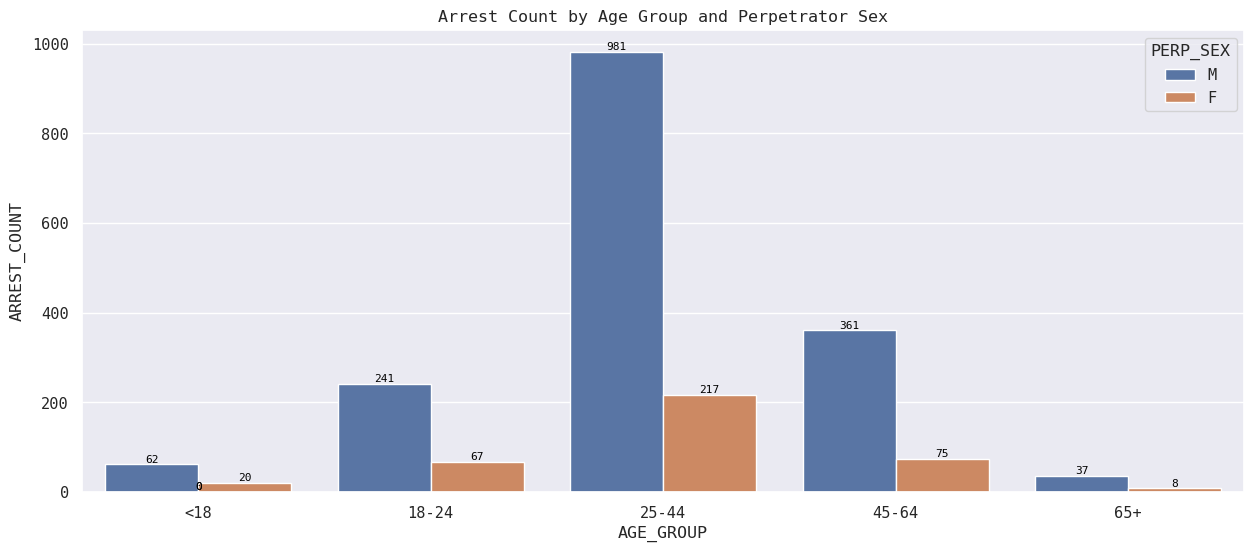

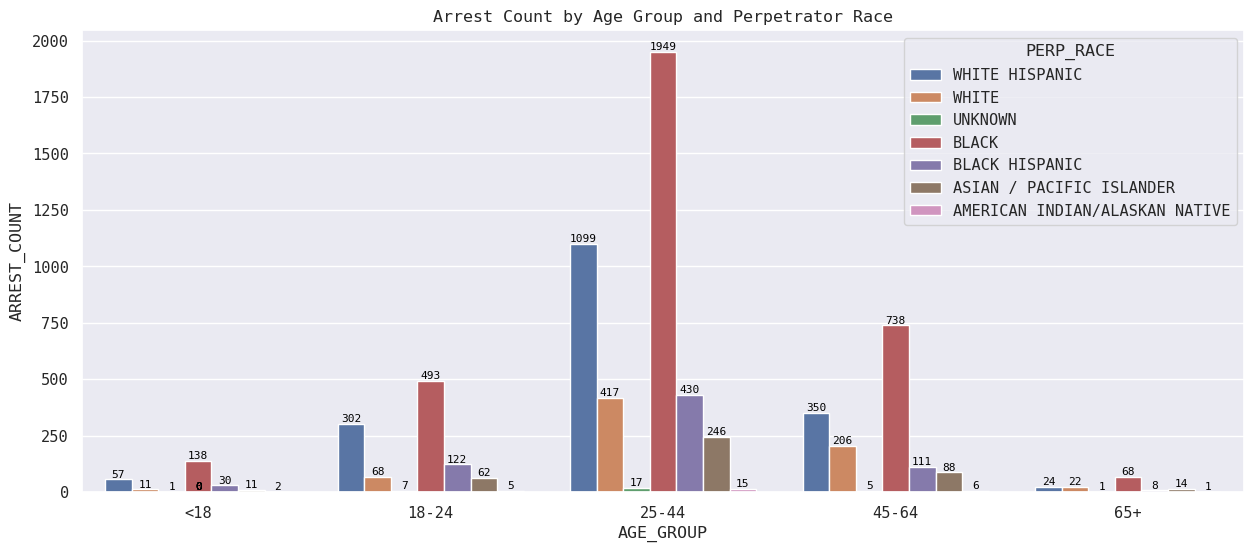

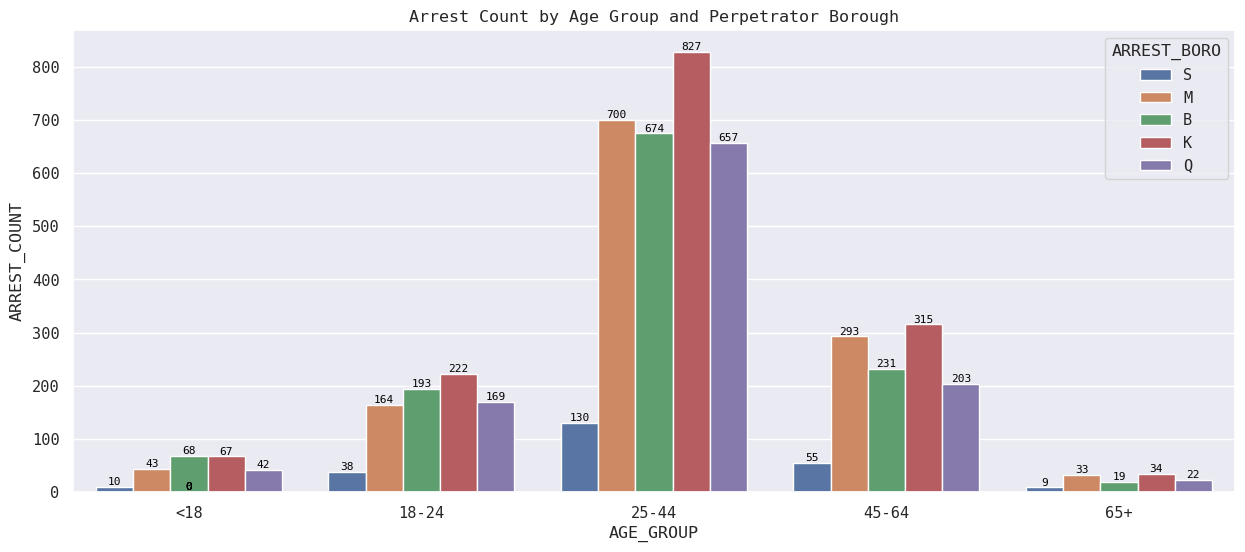

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='monospace', font_scale=1, color_codes=True)

# Create a grouped bar chart for `AGE_GROUP` by `PERP_SEX`
plt.figure(figsize=(15, 6))
a = sns.barplot(data=df_demographics, x='AGE_GROUP', y='ARREST_COUNT', hue='PERP_SEX', errorbar=None)
plt.title('Arrest Count by Age Group and Perpetrator Sex')
for p in a.patches:
    height = p.get_height()
    a.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height), 
               ha='center', va='bottom', fontsize=8, color='black')
plt.show()

# Create a grouped bar chart for `AGE_GROUP` by `PERP_RACE`
plt.figure(figsize=(15, 6))
b = sns.barplot(data=df_demographics, x='AGE_GROUP', y='ARREST_COUNT', hue='PERP_RACE', errorbar=None)
plt.title('Arrest Count by Age Group and Perpetrator Race')
for p in b.patches:
    height = p.get_height()
    b.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height), 
               ha='center', va='bottom', fontsize=8, color='black')
plt.show()

# Create a grouped bar chart for `AGE_GROUP` by `PERP_RACE`
plt.figure(figsize=(15, 6))
c = sns.barplot(data=df_demographics, x='AGE_GROUP', y='ARREST_COUNT', hue='ARREST_BORO', errorbar=None)
plt.title('Arrest Count by Age Group and Perpetrator Borough')
for p in c.patches:
    height = p.get_height()
    c.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height), 
               ha='center', va='bottom', fontsize=8, color='black')
plt.show()